In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [113]:
file = 'C:/Users/ymitropo/Documents/GitHub/CodingDojo/ExcelData/catsvdogs.xlsx'
dogvcat = pd.read_excel(file, engine = 'openpyxl')

1. Plot a histogram of the Percentage of Dog Owners.

2. Plot a histogram of the Percentage of Cat Owners.

3. (a) What can we see by comparing these two histograms? What information does this tell us?

3. (b) Optional/Bonus: plot these two histograms on the same plot. An example of what this could look like is given below:

4. Create two boxplots on the same plot: one of the mean number of cats per household and the other of the mean number of dogs. An example of what this might look like is given below:

5. What can we see by comparing these two boxplots? What information does this tell us?

Turn in a notebook with your code and answers to these 5 questions.

In [114]:
dogvcat.head()

,Location,Number of Households (in 1000),Percentage of households with pets,Number of Pet Households (in 1000),Percentage of Dog Owners,Dog Owning Households (1000s),Mean Number of Dogs per household,Dog Population (in 1000),Percentage of Cat Owners,Cat Owning Households,Mean Number of Cats,Cat Population,Unnamed: 12
0,Alabama,1828.0,59.5,1088.0,44.1,807.0,1.7,1410.0,27.4,501.0,2.5,1252.0,NaN
1,Arizona,2515.0,59.5,1497.0,40.1,1008.0,1.8,1798.0,29.6,743.0,1.9,1438.0,NaN
2,Arkansas,1148.0,62.4,716.0,47.9,550.0,2.0,1097.0,30.6,351.0,2.3,810.0,NaN
3,California,12974.0,52.9,6865.0,32.8,4260.0,1.6,6687.0,28.3,3687.0,1.9,7118.0,NaN
4,Colorado,1986.0,61.3,1217.0,42.5,845.0,1.6,1349.0,32.3,642.0,1.9,1191.0,NaN


In [115]:
dogvcat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Location                            49 non-null     object 
 1   Number of Households (in 1000)      49 non-null     float64
 2   Percentage of households with pets  49 non-null     float64
 3   Number of Pet Households (in 1000)  49 non-null     float64
 4   Percentage of Dog Owners            49 non-null     float64
 5   Dog Owning Households (1000s)       49 non-null     float64
 6   Mean Number of Dogs per household   49 non-null     float64
 7   Dog Population (in 1000)            49 non-null     float64
 8   Percentage of Cat Owners            49 non-null     float64
 9   Cat Owning Households               49 non-null     float64
 10  Mean Number of Cats                 49 non-null     float64
 11  Cat Population                      49 non-null

1. Plot a histogram of the Percentage of Dog Owners.

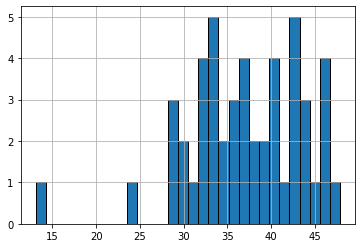

In [116]:
# Histogram of the percentage of dog owners.
dogvcat['Percentage of Dog Owners'].hist(bins=30, edgecolor='black');

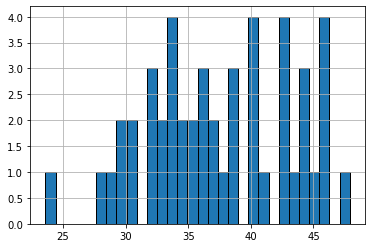

In [117]:
# Doing some EDA to understand where our highest count of dog owners are at. ~27-46%
dogFilter = dogvcat.loc[:, 'Percentage of Dog Owners'] >=20
dogvcat.loc[dogFilter, 'Percentage of Dog Owners'].hist(bins=30, edgecolor='black');

2. Plot a histogram of the Percentage of Cat Owners.

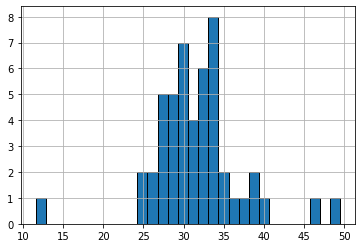

In [118]:
# Essentially, repeat the dog process with cats to understand our data better. Right off you can see a difference between density in the histogram.
dogvcat['Percentage of Cat Owners'].hist(bins=30, edgecolor='black');

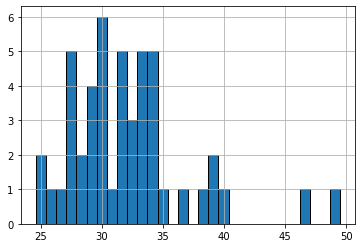

In [119]:
# More EDA... ~25-35%, higher total count...
catFilter = dogvcat.loc[:, 'Percentage of Cat Owners'] >=20
dogvcat.loc[catFilter, 'Percentage of Cat Owners'].hist(bins=30, edgecolor='black');

3a. What can we see by comparing these two histograms? What information does this tell us?
    
    - I can see that the number of household cat owners are more dense, and own more cats, but the percentage of them are lower overall than dog owners, meanwhile the data in cats is
    far more dense than the dogs.

3b. Optional/Bonus: plot these two histograms on the same plot.

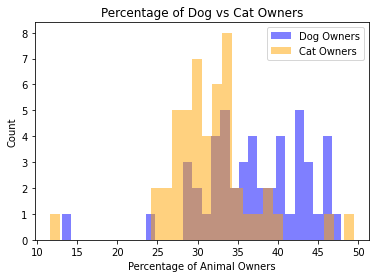

In [120]:
# Revised code here to better plot two histograms together. - #3, https://www.machinelearningplus.com/plots/matplotlib-histogram-python-examples/#:~:text=If%20you%20wish%20to%20have%20both%20the%20histogram,the%20sns%20and%20plt%20one%20after%20the%20other.
x1 = dogvcat['Percentage of Dog Owners']
x2 = dogvcat['Percentage of Cat Owners']
kwargs = dict(alpha=.5, bins=30) # This allows you to set parameters easily for all visualized datasets.
plt.hist(x1, **kwargs, color='blue', label='Dog Owners')
plt.hist(x2, **kwargs, color='orange', label='Cat Owners')
plt.title('Percentage of Dog vs Cat Owners')
plt.xlabel('Percentage of Animal Owners')
plt.ylabel('Count');
plt.legend();

4. Create two boxplots on the same plot: one of the mean number of cats per household and the other of the mean number of dogs.

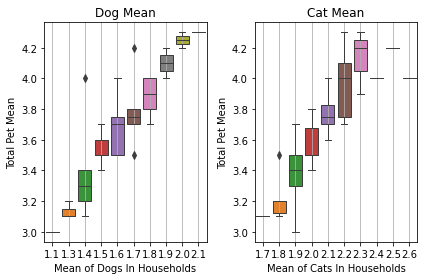

In [201]:
# I can't seem to solve this problem without significant trouble. Going to sumbit, and investigate the solution underneath this line of code to see what I'm doing wrong.

plt.fig_size = (10, 10)
plt.subplot(1,2,1)
dogMean = dogvcat.loc[:, 'Mean Number of Dogs per household'].dropna().to_numpy()
catMean = dogvcat.loc[:, 'Mean Number of Cats'].dropna().to_numpy()
sns.boxplot(x=dogMean, y=totalPetMean, data=dogvcat, linewidth=1);
plt.title('Dog Mean')
plt.xlabel('Mean of Dogs In Households')
plt.ylabel('Total Pet Mean')
plt.grid(axis= 'x')
plt.subplot(1,2,2)
sns.boxplot(x=catMean, y=totalPetMean, data=dogvcat, linewidth=1);
plt.title('Cat Mean')
plt.xlabel('Mean of Cats In Households')
plt.ylabel('Total Pet Mean')
plt.grid(axis= 'x')
plt.tight_layout()